# Single Neuron Regression Model

In this notebook we implement the single neuron model together with the gradient descent algorithm in order to solve a linear regression problem.

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Data retrieval
The data is retrieved from the Energy Efficiency dataset from UCI repository: https://archive.ics.uci.edu/dataset/242/energy+efficiency

The idea is to predict the Heating Load (column Y1) of the building using the Surface Area (column X2).

In [44]:
# Load the dataset from the Excel file
file_path = '/Users/ceciliaalberti/Documents/INDE_577/datasets/ENB2012_data.xlsx' 
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [60]:
# Selection of X and y

X = df['X1'].values.reshape(-1, 1)  # Surface area
y = df['Y1'] # Heating Load

# Data pre-processing
1. The data will be split into training and testing datasets (80/20 split).
2. The data will be normalized for better training performance. This step ensures that all the features (columns) in the dataset are on the same scale.

In [61]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data for better training performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Calculate mean and standard deviation of the target variable
y_mean = np.mean(y_test)
y_std = np.std(y_test)

print(f"Mean of Heating Load: {y_mean:.2f}")
print(f"Standard Deviation of Heating Load: {y_std:.2f}")

Mean of Heating Load: 22.91
Standard Deviation of Heating Load: 10.21


# Single Neuron creation
The Single Neuron class will simulate a single artificial neuron. In a neural network, a neuron is a fundamental unit that processes input data by applying a linear transformation (with weights and a bias) and then passes the result through an activation function.

In [48]:
# Define MAE and MSE functions
def mean_absolute_error(y_true, y_pred):
    """Calculate the Mean Absolute Error (MAE)."""
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    """Calculate the Mean Squared Error (MSE)."""
    return np.mean((y_true - y_pred) ** 2)

In [62]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron.

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias.
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean squared error computed after each iteration
        of stochastic gradient descent per epoch.

    Methods
    -------
    train(self, X, y, alpha=0.005, epochs=50)
        Trains the neuron using stochastic gradient descent.

    predict(self, X)
        Predicts the output for given input X.
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha=0.005, epochs=50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        self.mae_ = []
        self.mse_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            predictions = []
            for xi, target in zip(X, y):
                y_hat = self.predict(xi)
                predictions.append(y_hat)
                error = (y_hat - target)
                self.w_[:-1] -= alpha * error * xi
                self.w_[-1] -= alpha * error
                errors += 0.5 * (error ** 2)
            # Calculate MAE and MSE for the epoch
            epoch_mae = mean_absolute_error(y, predictions)
            epoch_mse = mean_squared_error(y, predictions)
            self.errors_.append(errors / N)
            self.mae_.append(epoch_mae)
            self.mse_.append(epoch_mse)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)
    

In [63]:
# Linear activation function
def linear_activation(x):
    return x


# Model training and data visualization
Two visualizations will be created to evaluate the performance of the single neuron model.

In [85]:
# Train the model
alpha = 0.0001  # smaller learning rate for demonstration
epochs = 50
node = SingleNeuron(activation_function=linear_activation)
node.train(X_train_scaled, y_train, alpha=alpha, epochs=epochs)

In [84]:
# Make predictions on the test set
y_test_pred = node.predict(X_test_scaled)

# Calculate R-squared on the test set
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R-squared: {test_r2:.4f}")

# Calculate MAE and MSE on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Test R-squared: 0.3505
Test MAE: 6.5335
Test MSE: 67.7001


The R-squared results indicate that the model's performance is not as strong as desired. This could potentially be improved by incorporating more features into the model. However, we have chosen to use only one feature in this instance to allow for visualization in a two-dimensional plot.


The MAE is lower than the standard deviation, which means that the model is performing better than a model that always predicts the mean. 

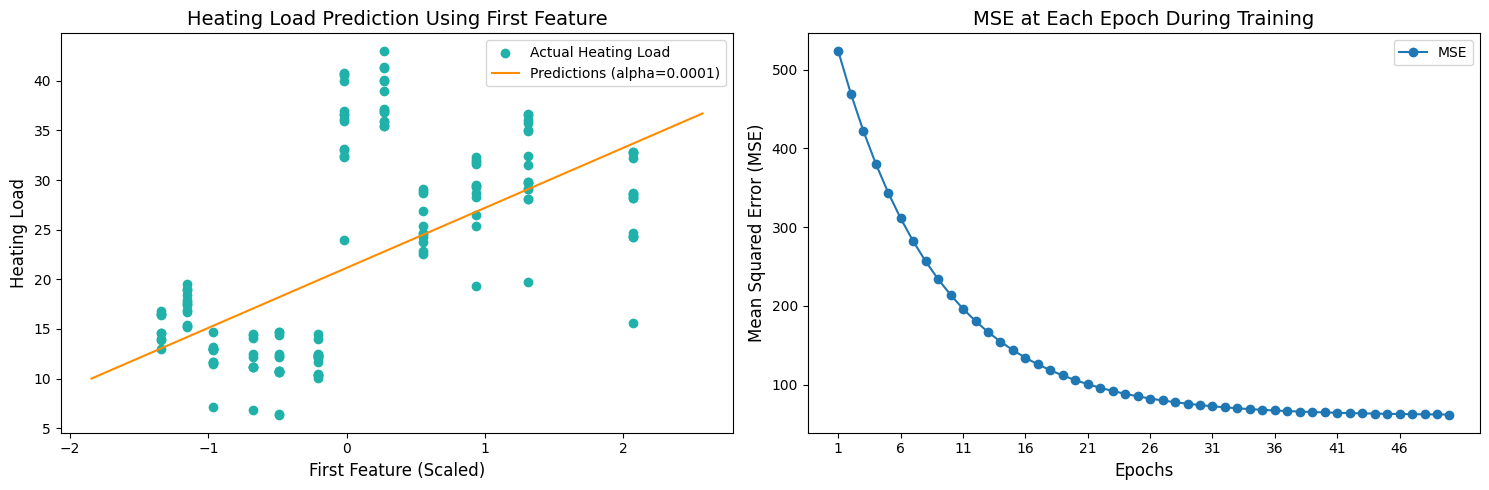

In [87]:
# Create the domain for plotting predictions
domain = np.linspace(np.min(X_test_scaled[:, 0]) - 0.5, np.max(X_test_scaled[:, 0]) + 0.5, 100)
domain_full = np.tile(domain.reshape(-1, 1), (1, X_train_scaled.shape[1]))

# Create subplots for both the prediction and the error plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First subplot: Scatter plot and prediction line
ax1.scatter(X_test_scaled[:, 0], y_test, color="lightseagreen", label="Actual Heating Load")
ax1.plot(domain, node.predict(domain_full), color='darkorange', label=f"Predictions (alpha={alpha})")
ax1.set_xlabel("First Feature (Scaled)", fontsize=12)
ax1.set_ylabel("Heating Load", fontsize=12)
ax1.set_title("Heating Load Prediction Using First Feature", fontsize=14)
ax1.legend()

# Second subplot: MSE over epochs
ax2.plot(range(1, len(node.mse_) + 1),
         node.mse_,
         marker="o",
         label="MSE")
ax2.set_xlabel("Epochs", fontsize=12)
ax2.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax2.set_xticks(range(1, len(node.mse_) + 1, max(1, epochs // 10)))
ax2.legend(fontsize=10)
ax2.set_title("MSE at Each Epoch During Training", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


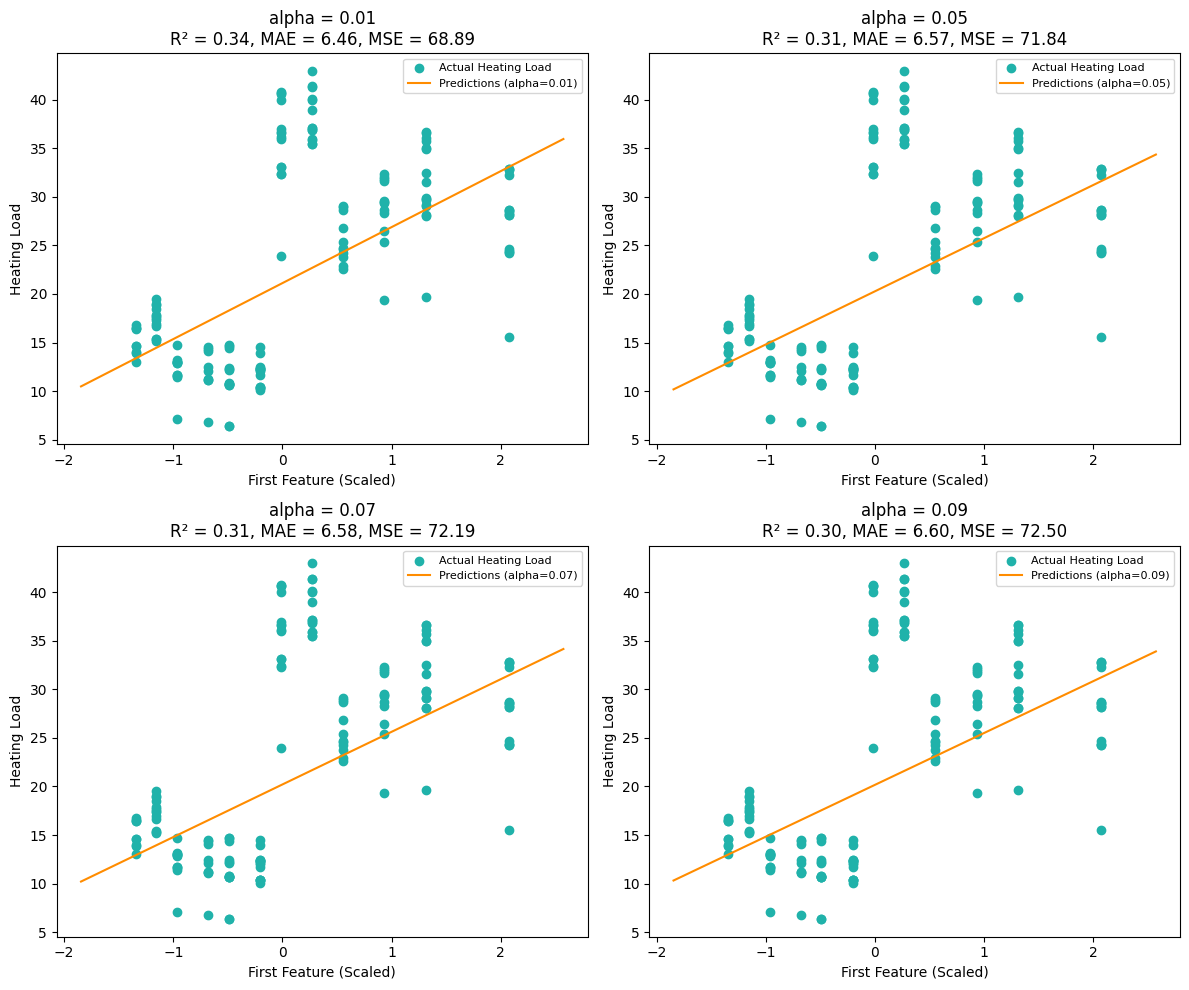

In [89]:
# Other possible choices of learning rates
alphas = [0.01, 0.05, 0.07, 0.09]

# Create subplots grid for multiple learning rates
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Loop over the axs and alpha values, train the model, and plot the predictions
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(activation_function=linear_activation)
    node.train(X_train_scaled, y_train, alpha=alpha, epochs=100)

    # Make predictions on the test set
    y_test_pred = node.predict(X_test_scaled)

    # Calculate MAE, MSE, and R-squared on the test set
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Plot predictions and actual values
    ax.scatter(X_test_scaled[:, 0], y_test, color="lightseagreen", label="Actual Heating Load")
    ax.plot(domain, node.predict(domain_full), color='darkorange', label=f"Predictions (alpha={alpha})")

    # Display MAE, MSE, and R-squared in the plot title
    ax.set_title(f"alpha = {alpha}\nR² = {test_r2:.2f}, MAE = {test_mae:.2f}, MSE = {test_mse:.2f}", fontsize=12)
    ax.set_xlabel("First Feature (Scaled)", fontsize=10)
    ax.set_ylabel("Heating Load", fontsize=10)
    ax.legend(fontsize=8)

# Show the plot grid
plt.tight_layout()
plt.show()
